In [2]:
from colorspacious import cspace_converter

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

In [ ]:

print(colors)

[[0.267004 0.004874 0.329415 1.      ]
 [0.221989 0.339161 0.548752 1.      ]
 [0.120565 0.596422 0.543611 1.      ]
 [0.477504 0.821444 0.318195 1.      ]]


In [3]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

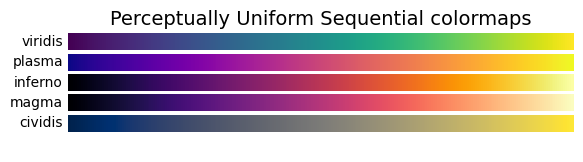

In [4]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

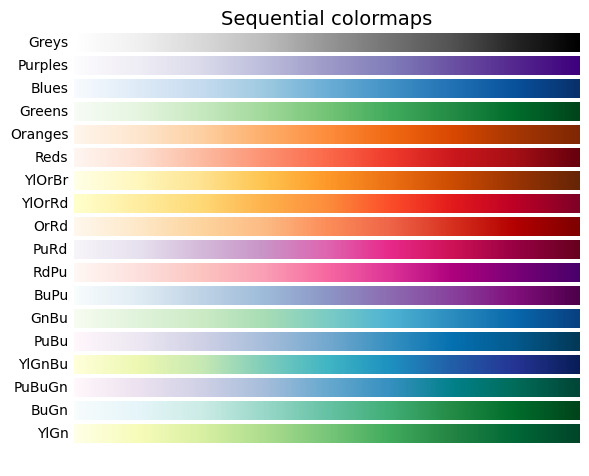

In [5]:
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

In [1]:
import torch

train_res = torch.load('train_res_example.pt')
test_res = torch.load('test_res_example.pt')

print(train_res)
print(test_res)

{'MAP': {'nll': [0.5033256976978755], 'acc': [0.844]}, 'NUQLS': {'nll': [0.5730941971918087], 'acc': [0.815]}}
{'MAP': {'nll': [0.5259737083013409], 'acc': [0.8299999833106995], 'ece': [0.09929487109184265], 'oodauc': [0.7438], 'aucroc': [0.7494], 'varroc': [], 'time': [6.819732427597046], 'mem': [0.0]}, 'NUQLS': {'nll': [0.5293368816084257], 'acc': [0.8100000023841858], 'ece': [0.06496739387512207], 'oodauc': [0.7474], 'aucroc': [0.7633], 'varroc': [0.36929999999999996], 'time': [18.54954981803894], 'mem': [0.0]}, 'SWAG': {'nll': [0.4450936320867767], 'acc': [0.8399999737739563], 'ece': [0.08057935535907745], 'oodauc': [0.7572], 'aucroc': [0.7543000000000001], 'varroc': [0.36929999999999996], 'time': [8.131224632263184], 'mem': [0.0]}}


In [5]:
import configparser

#--- Get hyperparameters from config file
config = configparser.ConfigParser()
config.read('utils/classification.ini')
field = f"{'lenet'}_{'mnist'}"
n_experiment = config.getint(field,'n_experiment')
epochs = config.getint(field,'epochs')
lr = config.getfloat(field,'lr')
wd = config.getfloat(field,'wd')
bs = config.getint(field,'bs')
S = config.getint(field,'S')
nuqls_S = config.getint(field,'nuqls_S')
nuqls_epoch = config.getint(field,'nuqls_epoch')
nuqls_lr = config.getfloat(field,'nuqls_lr')
nuqls_wd = config.getfloat(field,'nuqls_wd')
nuqls_bs = config.getint(field,'nuqls_bs')
nuqls_gamma = config.getfloat(field,'nuqls_gamma')
nuqls_parallel = config.getboolean(field,'nuqls_parallel')
print(f'nuqls_parallel = {nuqls_parallel}')
# ---

nuqls_parallel = True


In [8]:
res_text = f"result.txt"
results = open(res_text,'w')

percentage_metrics = ['acc','ece','oodauc','aucroc','varroc']
methods = ['MAP','NUQLS','SWAG']
import time
import numpy as np
n_experiment = 1

results.write("Training Details:\n")
results.write(f'MAP/DE: epochs: {epochs}; S: {S}; lr: {lr}; wd: {wd}; bs: {bs}; n_experiment: {n_experiment}\n')
results.write(f"NUQLS: epochs: {nuqls_epoch}; S: {nuqls_S}; lr: {nuqls_lr}; wd: {nuqls_wd}; bs: {nuqls_bs}; gamma: {nuqls_gamma}\n")

if n_experiment > 1:
    results.write("\nTrain Results:\n")
    for m in train_res.keys():
        results.write(f"{m}: ")
        for k in train_res[m].keys():
            results.write(f"{k}: {np.mean(train_res[m][k]):.4} +- {np.std(train_res[m][k]):.4}; ")
        results.write('\n')
    results.write("\nTest Prediction:\n")
    for m in test_res.keys():
        results.write(f"{m}: ")
        for k in test_res[m].keys():
            if k == 'varroc' and m == 'MAP':
                continue
            results.write(f"{k}: {np.mean(test_res[m][k]):.4} +- {np.std(test_res[m][k]):.4}; ")
        results.write('\n')
else:
    results.write("\nTrain Results:\n")
    for m in train_res.keys():
        results.write(f"{m}: ")
        for k in train_res[m].keys():
            results.write(f"{k}: {train_res[m][k][0]:.4}; ")
        results.write('\n')
    results.write("\nTest Prediction:\n")
    for m in test_res.keys():
        results.write(f"{m}: ")
        for k in test_res[m].keys():
            if k == 'varroc' and m == 'MAP':
                continue
            results.write(f"{k}: {test_res[m][k][0]:.4}; ")
        results.write('\n')

results.close()

In [11]:
import torch
from torchvision.transforms import ToTensor

train = torchvision.datasets.SVHN(root='./data/SVHN',
                          split='train',
                          download=True,
                          transform=ToTensor())

ood_test_data = torchvision.datasets.CIFAR10(
        root="data/CIFAR10",
        train=False,
        download=True,
        transform=ToTensor()
    ) 

Using downloaded and verified file: ./data/SVHN\train_32x32.mat
Files already downloaded and verified


In [8]:
from utils.metrics import *
_,targets = next(iter(DataLoader(train,len(train))))
print(targets)

tensor([1, 9, 2,  ..., 1, 6, 9])


In [13]:
print(torch.tensor(ood_test_data.targets))

tensor([3, 8, 8,  ..., 5, 1, 7])


In [2]:
import torch
torch.manual_seed(0)
torch.randn(100)

tensor([-1.1258e+00, -1.1524e+00, -2.5058e-01, -4.3388e-01,  8.4871e-01,
         6.9201e-01, -3.1601e-01, -2.1152e+00,  3.2227e-01, -1.2633e+00,
         3.4998e-01,  3.0813e-01,  1.1984e-01,  1.2377e+00,  1.1168e+00,
        -2.4728e-01, -1.3527e+00, -1.6959e+00,  5.6665e-01,  7.9351e-01,
         5.9884e-01, -1.5551e+00, -3.4136e-01,  1.8530e+00,  7.5019e-01,
        -5.8550e-01, -1.7340e-01,  1.8348e-01,  1.3894e+00,  1.5863e+00,
         9.4630e-01, -8.4368e-01, -6.1358e-01,  3.1593e-02, -4.9268e-01,
         2.4841e-01,  4.3970e-01,  1.1241e-01,  6.4079e-01,  4.4116e-01,
        -1.0231e-01,  7.9244e-01, -2.8967e-01,  5.2507e-02,  5.2286e-01,
         2.3022e+00, -1.4689e+00, -1.5867e+00, -6.7309e-01,  8.7283e-01,
         1.0554e+00,  1.7784e-01, -2.3034e-01, -3.9175e-01,  5.4329e-01,
        -3.9516e-01, -4.4622e-01,  7.4402e-01,  1.5210e+00,  3.4105e+00,
        -1.5312e+00, -1.2341e+00,  1.8197e+00, -5.5153e-01, -5.6925e-01,
         9.1997e-01,  1.1108e+00,  1.2899e+00, -1.4

In [14]:

_,targets = next(iter(DataLoader(ood_test_data,len(ood_test_data))))
print(targets)

tensor([3, 8, 8,  ..., 5, 1, 7])


In [39]:
loader = torch.utils.data.DataLoader(train,len(train))
train_set,_ = next(iter(loader))

train_set.mean((0,2,3))

tensor([0.4377, 0.4438, 0.4728])

In [14]:
train = torchvision.datasets.CIFAR10(root='./data/CIFAR10',
                          train=True,
                          download=True,
                          transform=ToTensor())

100%|██████████| 170498071/170498071 [00:13<00:00, 12887125.91it/s]


Extracting ./data/CIFAR10\cifar-10-python.tar.gz to ./data/CIFAR10


In [25]:
loader = torch.utils.data.DataLoader(train,len(train))
train_set,_ = next(iter(loader))

In [3]:
import torch
dev = torch.device('cuda', 0)
print(dev.type)

cuda


In [1]:
from tqdm import tqdm, trange
from random import random, randint
from time import sleep

with trange(10) as t:
    for i in t:
        # Description will be displayed on the left
        t.set_description('GEN %i' % i)
        # Postfix will be displayed on the right,
        # formatted automatically based on argument's datatype
        metrics = {'loss': random(),
                   'gen': randint(1,999),
                   'str': 'h',
                   'lst': [1,2]}
        t.set_postfix(metrics)
        # t.set_postfix(loss=random(), gen=randint(1,999), str='h',
        #               lst=[1, 2])
        sleep(0.1)
        print(t.format_dict['n'])

with tqdm(total=10, bar_format="{postfix[0]} {postfix[1][value]:>8.2g}",
          postfix=["Batch", {"value": 0}]) as t:
    for i in range(10):
        sleep(0.1)
        t.postfix[1]["value"] = i / 2
        t.update()

GEN 2:  20%|██        | 2/10 [00:00<00:00,  9.61it/s, loss=0.187, gen=828, str=h, lst=[1, 2]]

0
1


GEN 4:  50%|█████     | 5/10 [00:00<00:00,  9.61it/s, loss=0.0167, gen=204, str=h, lst=[1, 2]]

2
3
4


GEN 7:  80%|████████  | 8/10 [00:00<00:00,  9.62it/s, loss=0.875, gen=418, str=h, lst=[1, 2]] 

5
6
7


GEN 9: 100%|██████████| 10/10 [00:01<00:00,  9.56it/s, loss=0.199, gen=309, str=h, lst=[1, 2]]


8
9


Batch      4.5


In [18]:
from tqdm import tqdm
class TqdmExtraFormat(tqdm):
    """Provides a `total_time` format parameter"""
    @property
    def format_dict(self):
        d = super().format_dict
        total_time = d["elapsed"] * (d["total"] or 0) / max(d["n"], 1)
        d.update(total_time=self.format_interval(total_time) + " in total")
        return d

for i in TqdmExtraFormat(
      range(9), ascii=" .oO0",
      bar_format="{total_time}: {percentage:.0f}%|{bar}{r_bar}"):
    if i == 4:
        break

00:00 in total: 44%|0000.     | 4/9 [00:00<?, ?it/s]


In [32]:
epochs = 500

t = range(500)

for ti in t:
    if ti % (epochs // 10) == 0:
        print(ti)

0
50
100
150
200
250
300
350
400
450
